# Schematic visualization of the online rule-based learning algorithm (no real data, just visualizing the approach)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0, '..')

from plotting import default_plot
from failure_detection import simple_lowpass_filter

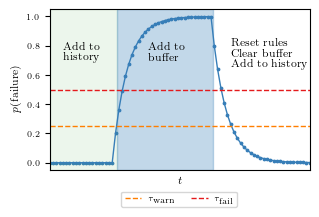

In [49]:
failure = simple_lowpass_filter(np.concatenate([np.zeros((20)), np.ones((30)), np.zeros((30))]), 0.2)

fig, axs = default_plot()
axs.plot(failure, color='C1')
axs.scatter(np.arange(len(failure)), failure, color='C1', s=3)

axs.axvspan(0, 20.5, color='C6', alpha=0.1)
axs.axvspan(20.5, 49.5, color='C1', alpha=0.3)

txt_y = 0.70
axs.text(4, txt_y, f'Add to\nhistory')
axs.text(30, txt_y, f'Add to\nbuffer')
axs.text(55, txt_y-0.05, f'Reset rules\nClear buffer\nAdd to history')

axs.axhline(0.25, label=r'$\tau_{\textrm{warn}}$', color='C3', linestyle='--')
axs.axhline(0.5, label=r'$\tau_{\textrm{fail}}$', color='C0', linestyle='--')
axs.set_xlabel(r'$t$')
axs.set_ylabel(r'$p(\textrm{failure})$')
axs.set_xlim(0, len(failure)-1)
axs.set_xticks([])
fig.tight_layout()
fig.legend(ncols=2, bbox_to_anchor=(0.75, 0.05))
fig.savefig('../plots/schematic.pdf', transparent=True, bbox_inches='tight')